In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sepfir2d,convolve2d
from scipy.ndimage import convolve

In [2]:
def display(img,title=''):
    plt.figure(figsize=(5,5))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Hough transform

Mapping from image space to Hough space\
Line detection:
- $y=mx+c \Leftrightarrow c=-mx+y$
$\Rightarrow$ Issues:\
- Slope of the line $-\infty \leq m \leq \infty $
    - Large accumulator
    - More memory and Computation

Use $x.\sin(\theta)-y\cos(\theta)+\rho=0$ because: 
- Orientation of $\theta$ is finite: $0 \leq \theta < \pi$
- Distance $\rho$ is finite because it cannot be greater than size of image

Link for further: https://www.youtube.com/watch?v=XRBc_xkZREg&list=PL2zRqk16wsdqXEMpHrc4Qnb5rA1Cylrhx&index=10



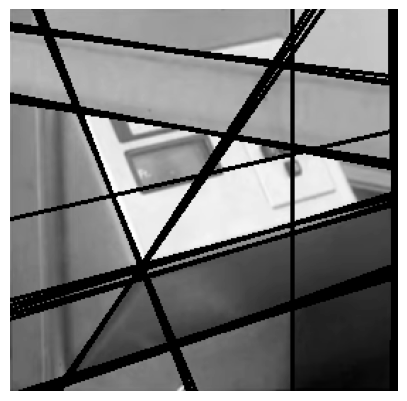

In [14]:
blank_img = cv.imread('./img/line_detection.png')
blank_img=cv.cvtColor(blank_img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(blank_img, 50, 150)
lines=cv.HoughLines(edges,1,np.pi/180,60)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
 
    # Stores the value of sin(theta) in b
    b = np.sin(theta)
 
    # x0 stores the value rcos(theta)
    x0 = a*r
 
    # y0 stores the value rsin(theta)
    y0 = b*r
 
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
 
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
 
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
 
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
 
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv.line(blank_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
display(blank_img)